In [4]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yahoo_fin import options
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

In [62]:
stock = 'AMZN'

start_date = '2024-12-10'
end_date = '2025-01-10'

properties = ['Open', 'Close', 'Low', 'High']

stock_dict = {}

ticker = yf.Ticker(stock)
for prop in properties:
    stock_dict[prop] = ticker.history(start = start_date, end = end_date)[prop]
    
stock_data = pd.DataFrame(stock_dict)

# Defining different types of averages (High-Low vs. Open-Close)
stock_data['Average_OC'] = 0.5*(stock_data['Open'] + stock_data['Close'])
stock_data['Average_HL'] = 0.5*(stock_data['Open'] + stock_data['Close'])
stock_data['Date'] = stock_data.index[0:]
stock_data['Day'] = stock_data['Date'].dt.day
stock_data['Index'] = np.arange(len(stock_data))

print(stock_data)


                                 Open       Close         Low        High  \
Date                                                                        
2024-12-10 00:00:00-05:00  226.089996  225.039993  224.199997  229.059998   
2024-12-11 00:00:00-05:00  226.410004  230.259995  226.259995  231.199997   
2024-12-12 00:00:00-05:00  229.830002  228.970001  227.630005  231.089996   
2024-12-13 00:00:00-05:00  228.399994  227.460007  225.860001  230.199997   
2024-12-16 00:00:00-05:00  230.229996  232.929993  228.009995  233.000000   
2024-12-17 00:00:00-05:00  232.389999  231.149994  227.850006  232.729996   
2024-12-18 00:00:00-05:00  230.770004  220.520004  220.110001  231.399994   
2024-12-19 00:00:00-05:00  224.910004  223.289993  222.919998  226.089996   
2024-12-20 00:00:00-05:00  219.839996  224.919998  218.729996  226.210007   
2024-12-23 00:00:00-05:00  225.009995  225.059998  223.899994  226.880005   
2024-12-24 00:00:00-05:00  226.940002  229.050003  226.130005  229.139999   

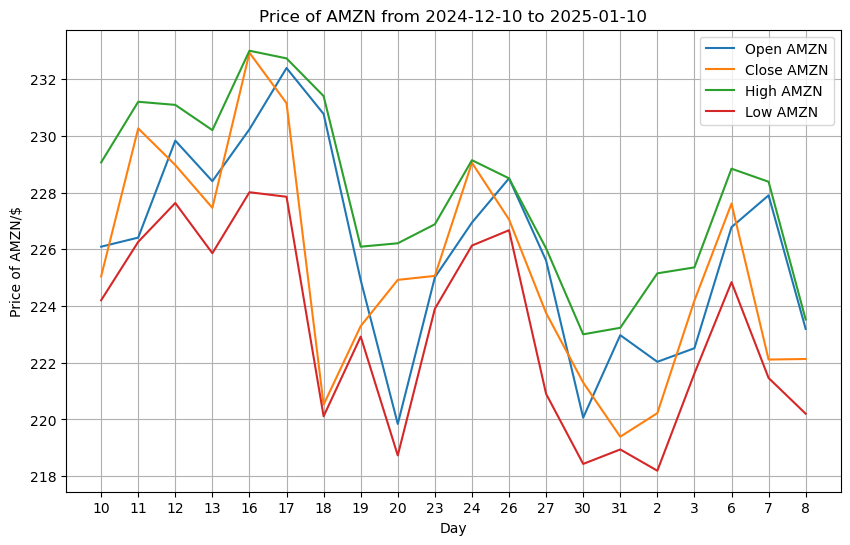

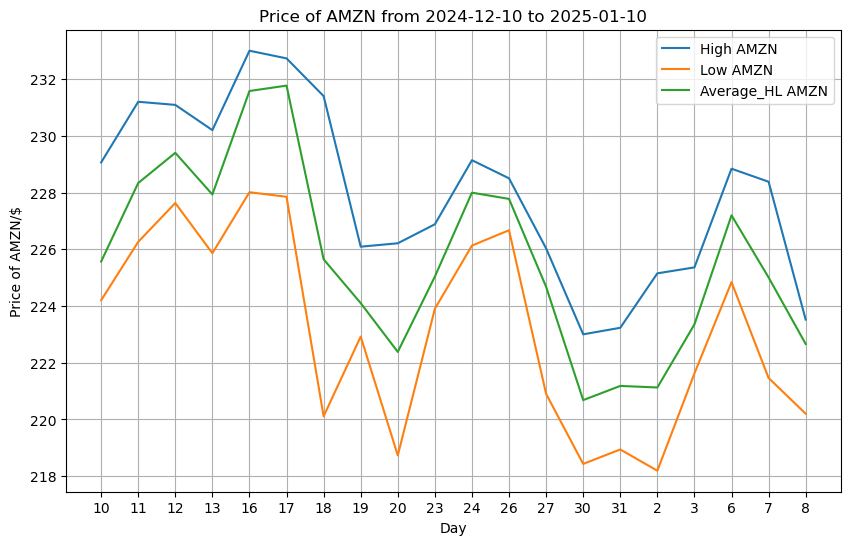

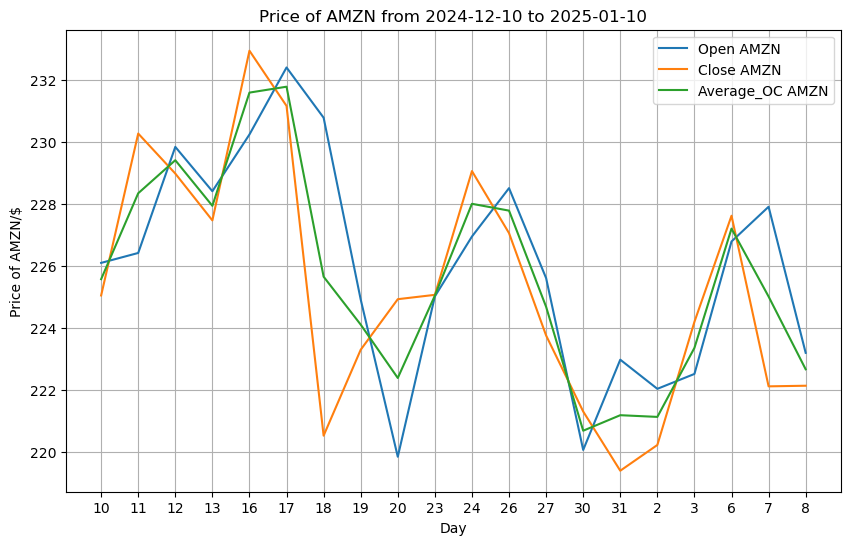

In [69]:
index = stock_data['Index']
time = stock_data['Day']

plt.figure(figsize=(10,6))
plt.plot(index, stock_data['Open'], label = f'Open {stock}')
plt.plot(index, stock_data['Close'], label = f'Close {stock}')
plt.plot(index, stock_data['High'], label = f'High {stock}')
plt.plot(index, stock_data['Low'], label = f'Low {stock}')
#plt.plot(index, stock_data['Average_OC'], label = f'Average_OC {stock}')
#plt.plot(index, stock_data['Average_HL'], label = f'Average_HL {stock}')
plt.xticks(index, time)
plt.xlabel('Day')
plt.ylabel(f'Price of {stock}/$')
plt.title(f'Price of {stock} from {start_date} to {end_date}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(index, stock_data['High'], label = f'High {stock}')
plt.plot(index, stock_data['Low'], label = f'Low {stock}')
plt.plot(index, stock_data['Average_HL'], label = f'Average_HL {stock}')
plt.xticks(index, time)
plt.xlabel('Day')
plt.ylabel(f'Price of {stock}/$')
plt.title(f'Price of {stock} from {start_date} to {end_date}')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(index, stock_data['Open'], label = f'Open {stock}')
plt.plot(index, stock_data['Close'], label = f'Close {stock}')
plt.plot(index, stock_data['Average_OC'], label = f'Average_OC {stock}')
plt.xticks(index, time)
plt.xlabel('Day')
plt.ylabel(f'Price of {stock}/$')
plt.title(f'Price of {stock} from {start_date} to {end_date}')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Average_HL Stock Price Prediction using RandomForestRegressor

